# Gist - Creating reports using Jupyter Notebooks
Gordon Bean  
*brazilbean* on **GitHub**

## Overview
This gist demonstrates one way to use Jupyter Notebooks to create HTML reports generated with in-line or dynamic code.

Note: this method relies on the [Python Markdown](https://github.com/ipython-contrib/IPython-notebook-extensions/tree/master/nbextensions/usability/python-markdown) notebook extension.

## The gist
### Key ideas
- Use Raw notebook cells to insert open and close HTML comment tags to hide swaths of cells from the final HTML output.
  - For other formats (e.g. $\LaTeX$) or custom use-cases, you can create a nbconvert pre-processor that screens cells for special comment tags and excludes them.
- Use the Python Markdown extension to embed code in Markdown cells. 

### Putting it together
- Compute results first
- Capture figures using `save_img_tag`
- Compile report sections in Markdown cells
- Export the report using nbconvert

### Caveats
- The Python Markdown extension requires that you execute all of the code in a notebook session before exporting. If you want to embed results in markdown cells using nbconvert on a notebook that hasn't already been rendered (i.e. using the Execution pre-processor), you need to get fancy with the pre-processing (out of scope for this gist).

## Example

### Imports
*NOTE: You can continue to use Markdown cells to structure the hidden sections.*

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import io, base64

%matplotlib inline

### Handy functions

In [10]:
def save_img_tag(fig=None, format='png', alt="image", bbox_inches='tight'):
    if fig is None:
        fig = plt.gcf()
    
    # Save data to BytesIO stream
    data = io.BytesIO();
    plt.savefig(data, format=format, bbox_inches=bbox_inches);
    data.seek(0)
    
    # Encode in base64
    data64 = base64.b64encode(data.read())
    
    # Convert to <img> tag with URI
    uri = 'data:image/png;base64,' + (data64.decode())
    img_tag = '<img alt="{}" src = "{}" />'.format(alt, uri)
    
    return img_tag

### Compute results

In [3]:
foo = np.random.rand(6,6)
foo

array([[ 0.20258051,  0.45594695,  0.59081644,  0.77863322,  0.95562066,
         0.77541216],
       [ 0.2313933 ,  0.7773782 ,  0.63143983,  0.22231121,  0.51016535,
         0.93809008],
       [ 0.54847662,  0.15736908,  0.61739686,  0.21555361,  0.27859176,
         0.30264647],
       [ 0.13091739,  0.51608414,  0.63882124,  0.18896472,  0.23827327,
         0.48095137],
       [ 0.35712307,  0.80664108,  0.078699  ,  0.09834737,  0.97956833,
         0.81227637],
       [ 0.48393442,  0.95500417,  0.07009516,  0.83570162,  0.41744175,
         0.84856411]])

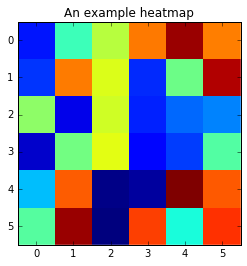

In [11]:
plt.imshow(foo, interpolation='none')
plt.title('An example heatmap')

example_heatmap = save_img_tag()

In order to create this example plot (who's dimensions are {{"{}x{}".format(*foo.shape)}}):

{{example_heatmap}}

I did the computation in hidden cells, saved the results, and displayed those results in this Markdown cells using the Python Markdown Jupyter Notebook extension. 

## Convert the notebook to HTML

In [16]:
import tempfile, subprocess

def nbconvert(notebook, to='html', path_to_python_markdown=None):
    '''Execute a system call to nbconvert
    
    If python-markdown is not on you PYTHONPATH, provide the path to the nbextension as an argument.
    '''
    
    if path_to_python_markdown is None:
        # Guess
        path_to_python_markdown = os.path.expandvars(r"C:\Users\%USERNAME%\.jupyter\nbextensions\usability\python-markdown")
    
    with tempfile.NamedTemporaryFile() as f:
        tmpf = f.name + '.py'
    
    with open(tmpf, 'wt') as tmp:
        print("import sys", file=tmp)
        print("sys.path.append(r'{}')".format(path_to_python_markdown), file=tmp)
        print("c=get_config()", file=tmp)
        print("c.NbConvertApp.notebooks = ['{}']".format(notebook), file=tmp)
        if os.path.exists(path_to_python_markdown):
            print("c.Exporter.preprocessors = [ 'pymdpreprocessor.PyMarkdownPreprocessor' ]", file=tmp)
        else:
            print("Could not find python-markdown extension - simple markdown formatting will be used.")
        
    cmd = 'jupyter nbconvert --config "{}" --to {} --reveal-prefix="http://cdn.jsdelivr.net/reveal.js/2.5.0"'.format(tmpf, to)
    print(subprocess.check_output(cmd, stderr=subprocess.STDOUT).decode())
    
    os.remove(tmpf)
    

In [20]:
import os

# Provide the name of this notebook
name = 'Gist - Creating reports using Jupyter Notebooks'

# Convert the notebook
# Be sure to save the notebook before converting to HTML
nbconvert(name + '.ipynb', to='html')

report = name + '.html'
print (report)

[NbConvertApp] Converting notebook Gist - Creating reports using Jupyter Notebooks.ipynb to html
[NbConvertApp] Writing 280004 bytes to Gist - Creating reports using Jupyter Notebooks.html

Gist - Creating reports using Jupyter Notebooks.html


## Output
GitHub uses nbviewer to render the notebook file. Thus, what you see in the gist is an almost-rendered version of the final report. To see the actual output, see [here](https://gist.github.com/brazilbean/832ac5006551d1dea5758909d84c50b9).

To see the underlying notebook, download the gist and open it with your Jupyter Notebook server.